In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import Javascript
import getpass

In [2]:
password = None
if password is None:
    password = getpass.getpass()

In [4]:
!echo $password | sudo -S mount -t tmpfs -o size=20g tmpfs /mnt/tmpfs/
!head -c 20G /dev/urandom >  /mnt/tmpfs/data

[sudo] password for fbdtemme: 

In [6]:
pwd = "/mnt/tmpfs"
max_threads = 4
iterations = 3
target = 'data'

In [7]:
fs = !du -b $pwd/$target | grep -o "[0-9]*"
file_size = int(fs[0])

In [8]:
file_size

21474836480

In [108]:
# Disable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g performance

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [10]:
def parse_real_time(data: str):
    results = []
    match = re.search(R"real\s(\d+)m([\d.]+)s", data)
    minutes = float(match.group(1))
    seconds = float(match.group(2))
    return minutes * 60 + seconds

def parse_real_time_sequence(data: str):
    results = []
    for match in re.findall(R"real\s(\d+)m([\d.]+)s", data):
        print(match[0])
        print(match[1])
        minutes = float(match[0])
        seconds = float(match[1])
        results.append(minutes * 60 + seconds)
    return results

In [11]:
data = {}

In [12]:
def run_benchmark(name: str, use_threads:bool = True):
    duration = np.ndarray(shape=(iterations, max_threads))
    
    if use_threads:
        for t in range(1, max_threads+1):
            for i in range(0, iterations):
                result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
                result_str = '\n'.join(result)
                print(f"-- iteration {i+1} | threads {t}\n{result_str}")
                duration[i, t-1] = parse_real_time(result_str)
    else:
        for i in range(0, iterations):
            t = 1
            result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
            result_str = '\n'.join(result)
            print(f"-- iteration {i+1} | threads {t}\n{result_str}")
            duration[i, :] = parse_real_time(result_str)

    speed = file_size / duration
    mean = np.mean(speed, axis=0)
    std  = np.std(speed, axis=0)
    return (mean, std)

### mktorrent

In [124]:
mktorrent_data = run_benchmark("mktorrent")

-- iteration 1 | threads 1

real	0m28.162s
user	0m27.683s
sys	0m8.902s

-- iteration 2 | threads 1

real	0m27.986s
user	0m27.609s
sys	0m8.889s

-- iteration 3 | threads 1

real	0m28.181s
user	0m27.754s
sys	0m8.962s

-- iteration 1 | threads 2

real	0m14.595s
user	0m28.737s
sys	0m9.069s

-- iteration 2 | threads 2

real	0m15.006s
user	0m29.592s
sys	0m9.702s

-- iteration 3 | threads 2

real	0m14.412s
user	0m28.222s
sys	0m7.648s

-- iteration 1 | threads 3

real	0m9.957s
user	0m29.156s
sys	0m6.112s

-- iteration 2 | threads 3

real	0m8.917s
user	0m26.392s
sys	0m4.969s

-- iteration 3 | threads 3

real	0m9.806s
user	0m28.855s
sys	0m5.998s

-- iteration 1 | threads 4

real	0m8.461s
user	0m32.634s
sys	0m5.436s

-- iteration 2 | threads 4

real	0m8.005s
user	0m30.956s
sys	0m5.183s

-- iteration 3 | threads 4

real	0m7.913s
user	0m30.867s
sys	0m5.059s



In [111]:
torrenttools_openssl_data = run_benchmark("torrenttools_openssl")

-- iteration 1 | threads 1

real	0m25.031s
user	0m25.644s
sys	0m4.914s

-- iteration 2 | threads 1

real	0m25.028s
user	0m25.629s
sys	0m4.868s

-- iteration 3 | threads 1

real	0m25.029s
user	0m25.828s
sys	0m4.900s

-- iteration 1 | threads 2

real	0m14.028s
user	0m26.333s
sys	0m5.060s

-- iteration 2 | threads 2

real	0m13.029s
user	0m26.376s
sys	0m4.963s

-- iteration 3 | threads 2

real	0m14.028s
user	0m26.478s
sys	0m5.048s

-- iteration 1 | threads 3

real	0m10.039s
user	0m27.031s
sys	0m4.931s

-- iteration 2 | threads 3

real	0m10.040s
user	0m28.462s
sys	0m6.022s

-- iteration 3 | threads 3

real	0m9.028s
user	0m26.141s
sys	0m4.364s

-- iteration 1 | threads 4

real	0m7.038s
user	0m26.593s
sys	0m3.867s

-- iteration 2 | threads 4

real	0m7.038s
user	0m26.085s
sys	0m3.858s

-- iteration 3 | threads 4

real	0m7.038s
user	0m26.470s
sys	0m3.897s



In [131]:
torrenttools_isal_data = run_benchmark("torrenttools_isal")

-- iteration 1 | threads 1

real	0m12.042s
user	0m10.569s
sys	0m5.719s

-- iteration 2 | threads 1

real	0m13.035s
user	0m12.115s
sys	0m7.153s

-- iteration 3 | threads 1

real	0m13.034s
user	0m12.192s
sys	0m7.178s

-- iteration 1 | threads 2

real	0m9.040s
user	0m15.522s
sys	0m8.528s

-- iteration 2 | threads 2

real	0m6.036s
user	0m10.661s
sys	0m5.359s

-- iteration 3 | threads 2

real	0m6.034s
user	0m10.122s
sys	0m4.858s

-- iteration 1 | threads 3

real	0m5.036s
user	0m12.114s
sys	0m4.752s

-- iteration 2 | threads 3

real	0m5.050s
user	0m11.906s
sys	0m4.505s

-- iteration 3 | threads 3

real	0m5.036s
user	0m11.547s
sys	0m4.590s

-- iteration 1 | threads 4

real	0m5.034s
user	0m12.335s
sys	0m4.770s

-- iteration 2 | threads 4

real	0m6.034s
user	0m12.863s
sys	0m5.622s

-- iteration 3 | threads 4

real	0m5.043s
user	0m11.989s
sys	0m4.665s



In [16]:
imdl_data = run_benchmark("imdl", use_threads=False)

-- iteration 1 | threads 1

real	0m53.898s
user	0m46.580s
sys	0m6.251s

-- iteration 2 | threads 1

real	0m53.197s
user	0m46.130s
sys	0m5.982s

-- iteration 3 | threads 1

real	0m52.085s
user	0m45.573s
sys	0m5.769s



In [17]:
dottorrent_cli_data = run_benchmark("dottorrent-cli", use_threads=False)

-- iteration 1 | threads 1

real	0m49.589s
user	0m35.314s
sys	0m13.116s

-- iteration 2 | threads 1

real	0m52.879s
user	0m36.673s
sys	0m14.807s

-- iteration 3 | threads 1

real	0m50.282s
user	0m35.805s
sys	0m13.379s



In [18]:
pyrocore_data = run_benchmark("pyrocore", use_threads=False)

-- iteration 1 | threads 1

real	0m35.283s
user	0m27.999s
sys	0m6.479s

-- iteration 2 | threads 1

real	0m34.396s
user	0m27.127s
sys	0m6.522s

-- iteration 3 | threads 1

real	0m34.223s
user	0m27.064s
sys	0m6.495s



In [19]:
transmission_create_data = run_benchmark("transmission-create", use_threads=False)

-- iteration 1 | threads 1

real	0m33.012s
user	0m26.457s
sys	0m5.619s

-- iteration 2 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	0m34.508s
user	0m27.231s
sys	0m6.191s

-- iteration 3 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	0m29.507s
user	0m24.728s
sys	0m4.114s



In [20]:
py3createtorrent_data = run_benchmark("py3createtorrent", use_threads=False)

-- iteration 1 | threads 1
rm: cannot remove '*.torrent': No such file or directory

real	0m27.878s
user	0m23.857s
sys	0m3.574s

-- iteration 2 | threads 1

real	0m27.635s
user	0m23.686s
sys	0m3.625s

-- iteration 3 | threads 1

real	0m27.226s
user	0m23.415s
sys	0m3.549s



In [132]:
torf_data = run_benchmark("torf-cli")

-- iteration 1 | threads 1

real	0m29.408s
user	0m26.989s
sys	0m14.318s

-- iteration 2 | threads 1

real	0m28.697s
user	0m26.312s
sys	0m13.155s

-- iteration 3 | threads 1

real	0m30.779s
user	0m27.930s
sys	0m15.829s

-- iteration 1 | threads 2

real	0m16.547s
user	0m27.921s
sys	0m14.498s

-- iteration 2 | threads 2

real	0m16.948s
user	0m28.600s
sys	0m16.076s

-- iteration 3 | threads 2

real	0m14.854s
user	0m25.579s
sys	0m11.321s

-- iteration 1 | threads 3

real	0m11.608s
user	0m25.830s
sys	0m11.292s

-- iteration 2 | threads 3

real	0m11.503s
user	0m26.430s
sys	0m11.274s

-- iteration 3 | threads 3

real	0m12.210s
user	0m26.184s
sys	0m11.692s

-- iteration 1 | threads 4

real	0m11.876s
user	0m27.290s
sys	0m11.390s

-- iteration 2 | threads 4

real	0m11.181s
user	0m25.869s
sys	0m11.054s

-- iteration 3 | threads 4

real	0m11.225s
user	0m25.542s
sys	0m10.993s



In [133]:
benchmark_data = {
    "mktorrent": mktorrent_data, 
    "imdl": imdl_data,
    "dottorrent-cli": dottorrent_cli_data,
    "pyrocore": pyrocore_data,
    "transmission-create": transmission_create_data,
    "py3createtorrent" : py3createtorrent_data,
    "torf-cli": torf_data,
    "torrenttools (OpenSSL)": torrenttools_openssl_data,
    "torrenttools (ISA-L)": torrenttools_isal_data,
}

In [134]:
programs = list(benchmark_data.keys())
threads = list(range(1, max_threads+1))
index = pd.MultiIndex.from_product((threads, programs), names=["threads", "programs"])

speed_mean_data = {}
speed_stddev_data = {}
for program, data in benchmark_data.items():
    speed_mean_data[program] = data[0]
    speed_stddev_data[program] = data[1]
    

speed_mean = pd.DataFrame(speed_mean_data).stack()
speed_stddev = pd.DataFrame(speed_stddev_data).stack()

In [135]:
df = pd.DataFrame()
df["speed_mean"], df["speed_stddev"] = speed_mean / 1e6, speed_stddev / 1e6
df.index = index

In [136]:
# df.to_csv("benchmark.csv")
# df = pd.read_csv("benchmark.csv", header=1)
# df

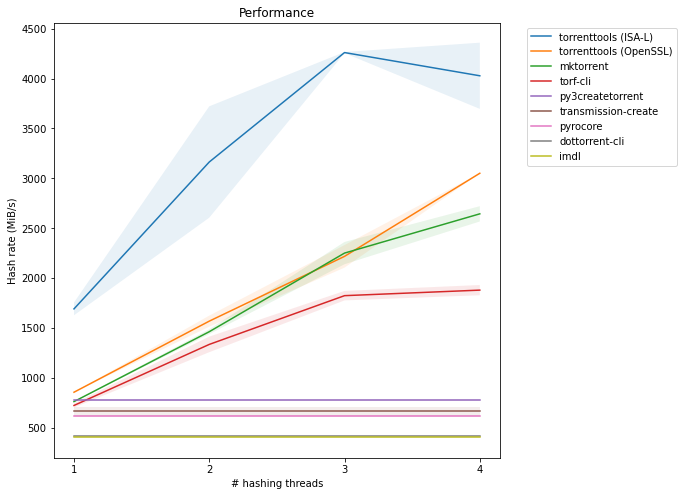

In [142]:
import matplotlib.cm
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

programs = df.index.unique(level=1)
threads = df.index.unique(level=0)
programs_by_max_speed = {}

for program in programs:
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    programs_by_max_speed[program] = np.max(sm)

sorted_programs = sorted(programs_by_max_speed.keys(), key=lambda x : programs_by_max_speed[x], reverse=True)

for idx, program in enumerate(sorted_programs):
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    sd = df.loc[df.index.get_level_values(1) == program, "speed_stddev"]
    ax.plot(threads, sm)
    ax.fill_between(threads, sm - sd, sm + sd, alpha=0.1)

ax.set_title("Performance")
ax.set_xlabel("# hashing threads")
ax.set_ylabel("Hash rate (MiB/s)")
ax.set_xticks(list(range(1, max_threads+1)))
ax.legend(sorted_programs, bbox_to_anchor=(1.05, 1), loc='upper left')
fig.patch.set_facecolor("white")